In [103]:
#importing the requried libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn

import warnings
warnings.filterwarnings("ignore")

In [104]:
#load the data set
df=pd.read_csv('health_care_diabetes.csv')

In [105]:
#Column names of the data set
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [106]:
#top 5 records of the data set
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [107]:
#last 5 records of the data set
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [108]:
#shape of the data set
df.shape

(768, 9)

In [109]:
#Checking the null values in the data set
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# There is no null values in the data set

In [110]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [111]:
#There is no null values in the data set but there are few zero values in the data considering those as the null values and checking 
#those zero values by the function zero_count

def zero_count(data_frame,col_name):
    zero_df=data_frame[data_frame[col_name]==0]
    zero_row_count=zero_df[col_name].size
    print("Total number of zero rows in column "  +col_name+ " is " +str(zero_row_count))

In [112]:
#checking the zero values in the data set for the column are Glucose, BloodPressure,SkinThickness,Insulin,BMI

for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    zero_count(df,i)

Total number of zero rows in column Glucose is 5
Total number of zero rows in column BloodPressure is 35
Total number of zero rows in column SkinThickness is 227
Total number of zero rows in column Insulin is 374
Total number of zero rows in column BMI is 11


In [113]:
#function plot is used to drew a histogram for the variables Glucose, BloodPressure,SkinThickness,Insulin,BMI
def plot(data_frame,col_name):
    plt.hist(data_frame[col_name])
    plt.title(col_name)
    plt.show()

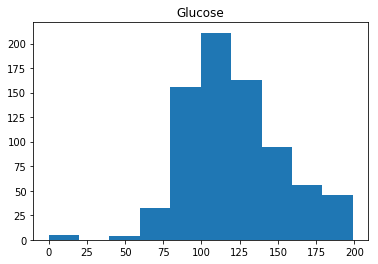

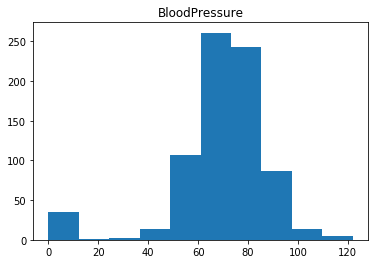

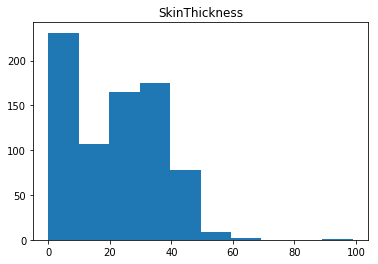

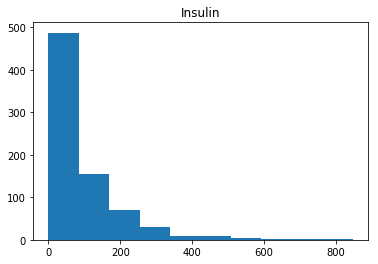

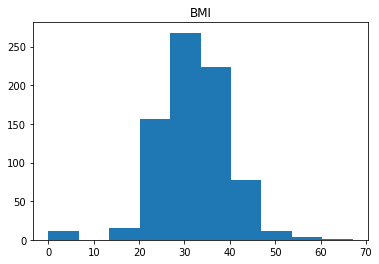

In [114]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    plot(df,i)

From the plots it is confirmed that there are some zero values in the data set for the columns Glucose, BloodPressure,SkinThickness,Insulin,BMI

In [292]:
#replacing the zero with NAN
def replacing_zero_NAN(dataframe,col_name):
    dataframe[col_name].replace(0,np.NaN,inplace=True)
    
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    replacing_zero_NAN(df,i)

In [117]:
#dropping all the NAN values
df.dropna(inplace=True)

In [118]:
df.shape

(392, 9)

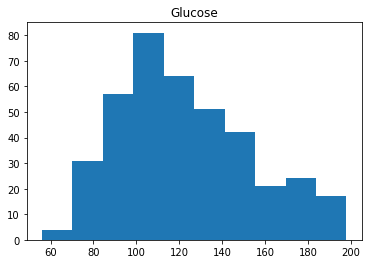

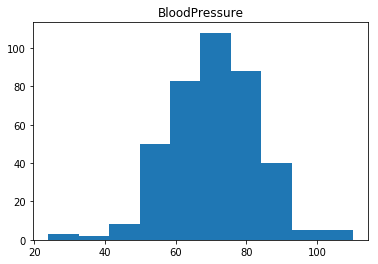

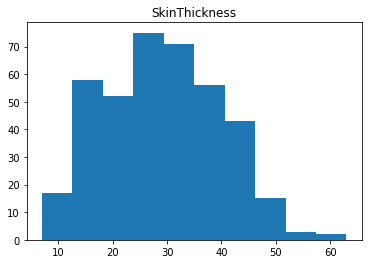

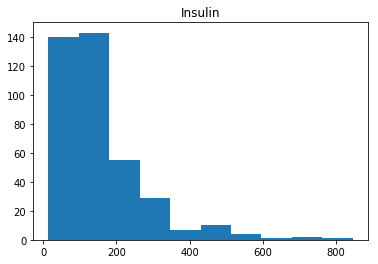

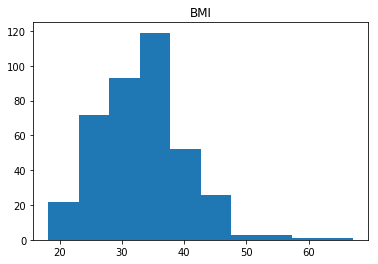

In [119]:
#plotting the histograms for the columns ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    plot(df,i)

 Now there is no zero values in the columns ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI'] 

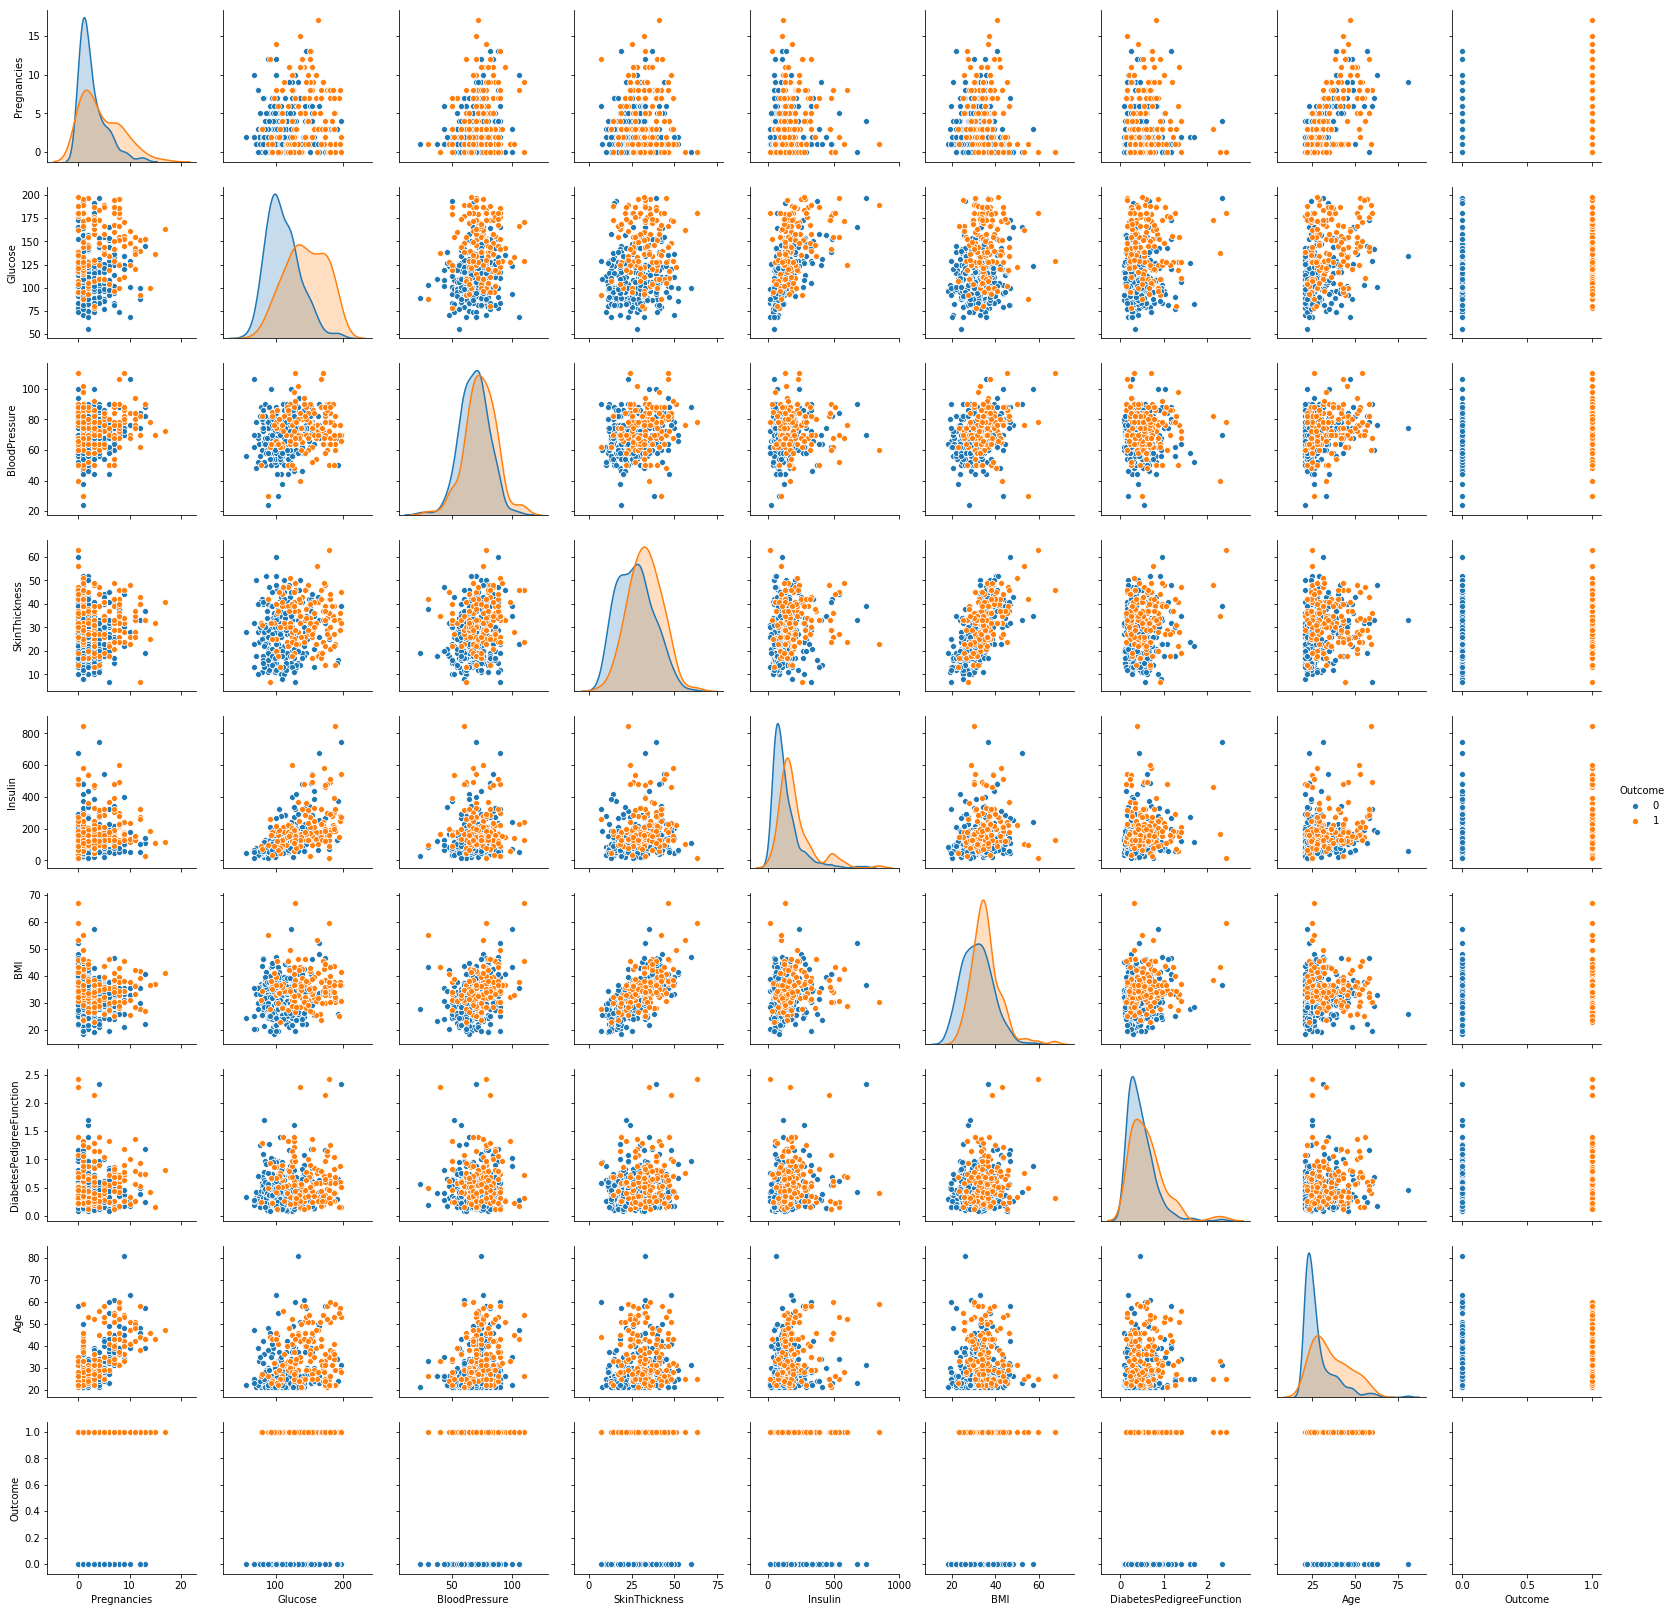

In [290]:
#Drawing the pair plots for all the labels
sn.pairplot(df,hue='Outcome')

In [121]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


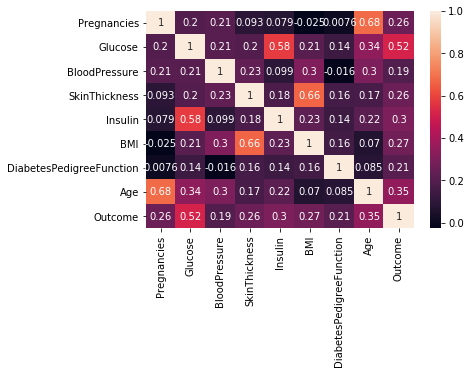

In [122]:
sn.heatmap(df.corr(),annot=True)

In [123]:
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
Y=df['Outcome']

In [124]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59


In [125]:
Y.head()

3     0
4     1
6     1
8     1
13    1
Name: Outcome, dtype: int64

In [126]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X=scalar.fit_transform(X)
Standard_X=pd.DataFrame(X)

In [127]:
Standard_X.describe()

,0,1,2,3,4,5,6,7
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-9.063045e-18,1.132881e-17,-4.531523e-16,1.087565e-16,1.064908e-16,1.631348e-16,1.812609e-17,1.110223e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.029213e+00,-2.161731e+00,-3.739001e+00,-2.108484e+00,-1.196867e+00,-2.120941e+00,-1.269525e+00,-9.682991e-01
25%,-7.174265e-01,-7.665958e-01,-6.941640e-01,-7.755315e-01,-6.681786e-01,-6.676780e-01,-7.340909e-01,-7.719850e-01
50%,-4.056403e-01,-1.176959e-01,-5.314565e-02,-1.384444e-02,-2.574448e-01,1.621036e-02,-2.131475e-01,-3.793569e-01
75%,5.297185e-01,6.609841e-01,5.878727e-01,7.478426e-01,2.859877e-01,5.718696e-01,4.751644e-01,5.040564e-01
max,4.271153e+00,2.445459e+00,3.151946e+00,3.223325e+00,5.812990e+00,4.846172e+00,5.497667e+00,4.921123e+00


In [128]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(Standard_X,Y,test_size=0.2,random_state=10)

print("shape of X train",X_train.shape)
print("shape of X test",X_test.shape)
print("shape of Y train",Y_train.shape)
print("shape of Y test",Y_test.shape)

shape of X train (313, 8)
shape of X test (79, 8)
shape of Y train (313,)
shape of Y test (79,)


In [129]:
X_train.head()

,0,1,2,3,4,5,6,7
149,-0.405640,-0.085251,0.427618,0.747843,-0.430164,0.942309,-0.892765,-0.183043
377,-1.029213,0.109419,1.228891,-0.204266,-0.303784,-0.810155,-0.023318,-0.968299
69,0.217932,1.017879,-0.694164,0.176577,1.077967,-0.040780,-0.829005,-0.771985
121,-0.405640,-1.058601,0.748127,-1.442008,-0.851429,-1.237585,-0.794228,-0.673828
210,-1.029213,0.498759,-0.854419,0.557421,0.092206,0.215678,0.031747,-0.968299


In [130]:
X_test.head()

,0,1,2,3,4,5,6,7
241,0.841505,1.017879,0.587873,1.128686,-0.135278,1.854160,0.138978,-0.379357
366,-1.029213,0.368979,-1.014673,-0.870742,1.136944,-0.952631,-0.495718,-0.968299
298,-0.717427,0.660984,1.228891,0.081366,1.465531,-0.425468,1.069286,-0.771985
341,1.465077,1.439664,2.831437,1.604740,0.631425,0.643108,-1.037673,1.191156
263,-0.093854,1.309884,-0.053146,-1.061164,-0.430164,-0.211752,-0.739163,-0.281200


In [131]:
Y_train.head()

305    0
736    0
144    0
252    0
414    1
Name: Outcome, dtype: int64

In [293]:
#build the logistic regression model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model=model.fit(X_train,Y_train)

print("Model score with X and Y train data",model.score(X_train,Y_train))
print("Model score with X and Y test data",model.score(X_test,Y_test))

#By using the model and predicting the X_test data 
y_pred=model.predict(X_test)

Model score with X and Y train data 0.7891373801916933
Model score with X and Y test data 0.7468354430379747


In [294]:
#confduion matrix for y_pred and y_test
confusion_matrix=sklearn.metrics.confusion_matrix(Y_test,y_pred)
pd.DataFrame(confusion_matrix)

,0,1
0,50,6
1,16,7


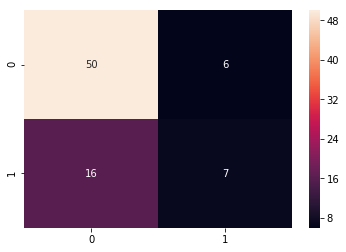

In [299]:
sn.heatmap(confusion_matrix,annot=True)

In [295]:
from sklearn.neighbors import KNeighborsClassifier
test_score = []
train_score = []
for i in range(1,15):
    KNN=KNeighborsClassifier(i)
    KNN.fit(X_train,Y_train)
    train_score.append(KNN.score(X_train,Y_train))
    test_score.append(KNN.score(X_test,Y_test)) 

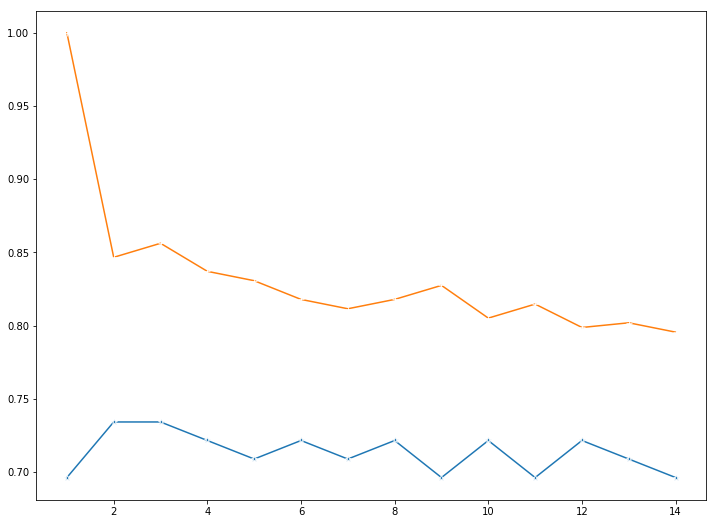

In [296]:
plt.figure(figsize=(12,9))
sn.lineplot(range(1,15),test_score,marker='*')
sn.lineplot(range(1,15),train_score,marker='+')

In [297]:
for i in range(1,15):
    KNN_11=KNeighborsClassifier(n_neighbors=i)
    KNN_11.fit(X_train,Y_train)
    print("score of train data with k is ",i,KNN_11.score(X_train,Y_train))
    y_pred=KNN_11.predict(X_test)
    print(sklearn.metrics.confusion_matrix(Y_test,y_pred))

score of train data with k is  1 1.0
[[45 11]
 [13 10]]
score of train data with k is  2 0.8466453674121406
[[51  5]
 [16  7]]
score of train data with k is  3 0.8562300319488818
[[46 10]
 [11 12]]
score of train data with k is  4 0.8370607028753994
[[50  6]
 [16  7]]
score of train data with k is  5 0.8306709265175719
[[45 11]
 [12 11]]
score of train data with k is  6 0.8178913738019169
[[49  7]
 [15  8]]
score of train data with k is  7 0.8115015974440895
[[46 10]
 [13 10]]
score of train data with k is  8 0.8178913738019169
[[49  7]
 [15  8]]
score of train data with k is  9 0.8274760383386581
[[46 10]
 [14  9]]
score of train data with k is  10 0.805111821086262
[[50  6]
 [16  7]]
score of train data with k is  11 0.8146964856230032
[[47  9]
 [15  8]]
score of train data with k is  12 0.7987220447284346
[[50  6]
 [16  7]]
score of train data with k is  13 0.8019169329073482
[[49  7]
 [16  7]]
score of train data with k is  14 0.7955271565495208
[[49  7]
 [17  6]]


In [255]:
from sklearn.model_selection import GridSearchCV
parameters={'n_neighbors': range(1,15)},
GSCV_model=GridSearchCV(KNeighborsClassifier(),param_grid=parameters)
GSCV_model.fit(X_train,Y_train)
print("best parameter",GSCV_model.best_params_)
print("Best score",GSCV_model.best_score_)

best parameter {'n_neighbors': 12}
Best score 0.7921658986175115


In [256]:
KNN_12=KNeighborsClassifier(n_neighbors=12)
model_KNN_12=KNN_12.fit(X_train,Y_train)
print("accuracy of train data",model_KNN_12.score(X_train,Y_train))
print("accuracy of test data",model_KNN_12.score(X_test,Y_test))

accuracy of train data 0.7987220447284346
accuracy of test data 0.7215189873417721


In [258]:
from sklearn.metrics import confusion_matrix
y_pred=model_KNN_12.predict(X_test)
pd.DataFrame(confusion_matrix(Y_test,y_pred))

,0,1
0,50,6
1,16,7


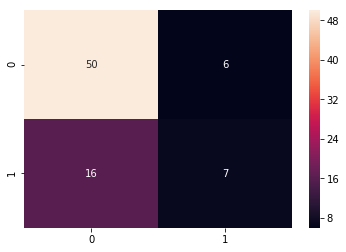

In [261]:
sn.heatmap(pd.DataFrame(confusion_matrix(Y_test,y_pred)),annot=True)

In [264]:
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(Y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        56
           1       0.54      0.30      0.39        23

    accuracy                           0.72        79
   macro avg       0.65      0.60      0.60        79
weighted avg       0.69      0.72      0.69        79



In [282]:
from sklearn.metrics import roc_curve
y_pred_prob=model_KNN_12.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

Text(0.5, 1.0, 'Roc for KNN at K=12')

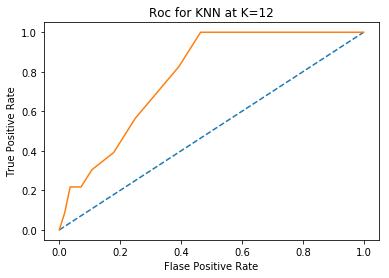

In [288]:
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr,'-')
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc for KNN at K=12")